Привет, Айдар!)
<br> Меня зовут Дуолан 👋 и я рад стать твоим проводником в мире кода и данных!
<br> Вместе мы прокачаем твой проект до самого верха! 🚀
<br> Давай общаться на «ты» и поддерживать дружескую атмосферу. Если ты согласен, конечно! 😊
<br> Пожалуйста, напиши мне ответ на каждый комментарий («исправлено», «не уверен, как это сделать» и т. д.)
<br> Оставь, пожалуйста, мои комментарии на месте – они пригодятся для последующих проверок.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если всё просто супер!
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Твой проект не может быть принят, пока есть красные комментарии.

-------------------

Пожалуйста, отмечай свои ответы и изменения таким образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

In [1]:
# Необходимые обновления
!pip install --upgrade matplotlib
!pip install --upgrade pandas

In [2]:
import pandas as pd
import numpy as np
from random import randint 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

## Откройте и изучите файл

In [3]:
try:
    df = pd.read_csv('users_behavior.csv')
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [4]:
display(df.describe())
display(df.info())
df.head()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Данные выглядят опрятно, но судя по описательной статистике в них должны быть выбросы.

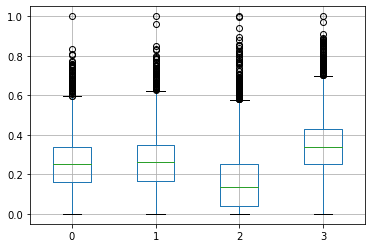

In [5]:
normalized = MinMaxScaler().fit_transform(df[df.columns.to_list()[:-1]])
pd.DataFrame(normalized).boxplot();

Выбросы действительно есть во всех признаках и их значительное количество. Не будем их удалять, возможно они пригодятся при обучении модели на краевых случаях.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍
</div>

## Разбейте данные на выборки

In [6]:
# Разбиваем данные на выборки
x = df.drop(['is_ultra'], axis=1)
y = df.is_ultra

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

В ячейке выше я разбил данные на 3 выборки, тренировочную, валидационную и тестовую. Тестовую оставим для финальной проверки.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

## Исследуйте модели

In [7]:
# Функция для выбора лучшей модели для моделей на основе деревьев
def get_best_model(range_, model_object, random_state=7765):
    score = 0
    best_model = None
    df = {'accuracy': [], 'depth': []}
    for i in range(1, range_+1):
        model = model_object(random_state=7765, max_depth=i)
        model.fit(x_train, y_train)
        model_pred = model.predict(x_val)
        df['accuracy'].append(score_m := accuracy_score(y_val, model_pred))
        df['depth'].append(i)
        if score_m > score:
            score = score_m
            best_model = model
    display(pd.DataFrame(df).style.background_gradient('coolwarm', subset=['accuracy']))
    return best_model

Функция что-бы не писать одно и тоже 2 раза.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

In [8]:
# DecisionTreeClassifier
best_tree = get_best_model(10, DecisionTreeClassifier)

,accuracy,depth
0,0.741835,1
1,0.762053,2
2,0.785381,3
3,0.797823,4
4,0.791602,5
5,0.782271,6
6,0.786936,7
7,0.788491,8
8,0.776050,9
9,0.779160,10


Лучше всего показала себя модель с максимальной глубиной ветвления 4.

In [9]:
# RandomForestClassifier
best_forest = get_best_model(10, RandomForestClassifier)

,accuracy,depth
0,0.744946,1
1,0.766719,2
2,0.791602,3
3,0.796267,4
4,0.799378,5
5,0.799378,6
6,0.802488,7
7,0.802488,8
8,0.799378,9
9,0.807154,10


Лучше всего показала себя модель с глубиной ветвления 10.

In [10]:
model_logistic = LogisticRegression(random_state=777)
model_logistic.fit(x_train, y_train)
model_pred = model_logistic.predict(x_val)
accuracy_score(y_val, model_pred)

0.7558320373250389

Логистическая регрессия тоже проходит барьер в 75%, но предсказывает хуже чем модели "на деревьях"

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

По модельной части замечаний нет - обучение выполнено четко 💪
</div>

## Проверьте модель на тестовой выборке

In [11]:
# Сохраним это для истории
# acs = {
#        'tree_p': accuracy_score(y_test, best_tree.predict(x_test)),
#        'forest_p': accuracy_score(y_test, best_forest.predict(x_test)),
#        'logistic_p': accuracy_score(y_test, model_logistic.predict(x_test))
# }
# pd.DataFrame.from_dict(acs, 
#                        orient='index', 
#                        columns=['accuracy_score']).style.background_gradient('coolwarm')

# Модель совершающая меньше всего ошибок была создана при помощи случайного леса высотой 10 ветвей. Она же самая сложная из рассмотреных.
# __Вывод:__ В ходе работы была подготовлена модель которая с точностью 79% определяет подходящий тариф сотовой связи. Модель основана на случайном лесе высотой 10 ветвей. Вторая по значимости модель на основе одного решающего дерева на тестовой выборке показала результат 77.4% правильных ответов, можно рассмотреть для работы её, если важна производительность работы модели. Производительность достигается за счёт небольшой высоты(4 ветви) и того что дерево только одно. Модель на основе логистической регресси не прошла необходимый порог в 75% на тестовой выборке из-за переобучения.


print('Random forest accuracy score on test sample', accuracy_score(y_test, best_forest.predict(x_test)))

Random forest accuracy score on test sample 0.7947122861586314


На тестовой выборке было решено проверить модель на основе случайного леса высотой 10 ветвей так как она показала самые хорошие результаты на валидационной выборке.

__Вывод:__ В ходе работы была подготовлена модель которая с точностью 79% определяет подходящий тариф сотовой связи. Модель основана на случайном лесе высотой 10 ветвей.

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Необходимо выполнить тестирование для одной конкретной модели. Определение наилучшей модели, на основе результатов тестовой выборки, может быть некорректным подходом, поскольку это может способствовать переобучению модели.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>
Насколько я понял замечание, проверять надо было только лучшую модель и я сделал лишнего, но не уверен что понял правильно. Чего я точно не понимаю это каким образом проверка всех трёх моделей на тестовых данных может способствовать переобучению? Мы же ничего не обучаем, а только проверяем.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успех:</b>

В идеале, тестовую выборку следует использовать только один раз - для оценки качества окончательной модели, которую мы выбрали для решения нашей задачи.

Если мы протестируем несколько моделей на тестовой выборке и выберем модель с лучшим результатом, то есть риск, что мы случайно выберем модель, которая просто "повезло" на данных этой конкретной тестовой выборки. Таким образом, результаты на реальных данных в будущем могут быть хуже.

То есть, при выборе модели мы используем информацию из тестовой выборки (т. е. модель, которая работает лучше на тестовой выборке), и это можно считать видом переобучения, так как мы подстраиваемся под конкретные тестовые данные.

Поэтому лучше использовать валидационную выборку для сравнения и выбора моделей, а тестовую выборку использовать только для окончательного теста выбранной модели.
</div>

## (бонус) Проверьте модели на адекватность

In [12]:
model_pred = best_forest.predict(x)
print('accuracy_score all data', score_m:=accuracy_score(y, model_pred))
i = 0
model_accuracy = [score_m]
while i < 5:
    print('try', i)
    print(r:=randint(1000, 2000), 'sample randint')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=r)
    model_pred = best_forest.predict(x_test)
    print('accuracy_score', score_m:=accuracy_score(y_test, model_pred))
    model_accuracy.append(score_m)
    i+=1
display(pd.DataFrame(model_accuracy).style.background_gradient('coolwarm'))

accuracy_score all data 0.8618543870566272
try 0
1647 sample randint
accuracy_score 0.8686994399502178
try 1
1780 sample randint
accuracy_score 0.8574984443061605
try 2
1274 sample randint
accuracy_score 0.851897946484132
try 3
1964 sample randint
accuracy_score 0.8618543870566272
try 4
1584 sample randint
accuracy_score 0.8525202240199129


,0
0,0.861854
1,0.868699
2,0.857498
3,0.851898
4,0.861854
5,0.852520


Для проверки модели на адекватность мною было решено сделать ресемплинг и заново прогнать алгоритм случайного леса 5 раз, а также посмотреть как ведёт себя модель если подать на вход все данные. Модель показала себя лучше(от 5 до 7%) чем на оригинальной тестовой выборке и прошла проверку на адекватность. __Просьба ревьюеру указать что надо было сделать для проверки на адекватность, так как это никак не освещалось в теоретической части, всё что сделано, основано не паре беглых запросов в гугл и собственных умозаключениях, сначала вообще 5 раз тренировал новую модель на известных оптимальных гиперпараметрах, потом понял что это наверное не правильно, а проверять надо саму модель, а не параметры__

In [13]:
# Сравним модель со случайным угадыванием наиболее частого результата.
print('0 and 1 counts in dependant variable', y.value_counts())
print(f'accuracy, predicting most common entry {accuracy_score(y, np.zeros(df.shape[0])):.2f}')
model_pred = best_forest.predict(x)
print(f'accuracy_score all data, {accuracy_score(y, model_pred):.2f}')

0 and 1 counts in dependant variable is_ultra
0    2229
1     985
Name: count, dtype: int64
accuracy, predicting most common entry 0.69
accuracy_score all data, 0.86


При сравнении результатов работы модели и стабильным угадыванием самого частого результата побеждает модель. С разницей в 17% в пользу модели. Проверка на адекватность пройдена.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Проверка на адекватность – это важный этап, который помогает убедиться, что модель работает лучше, чем случайное угадывание или простейшие модели.

Однако, проверка модели на адекватность обычно проводится несколько иначе. Мы сравниваем нашу модель с некоторым "базовым" или "наивным" алгоритмом. Например, для задачи классификации базовым алгоритмом может быть модель, которая всегда предсказывает самый частый класс в обучающей выборке. Если наша модель показывает результаты лучше, чем такой базовый алгоритм, то мы можем считать, что модель прошла проверку на адекватность.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Поправил. А какие ещё могут быть модели для проверки помимо самого частого класса?
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успех:</b>

Да, основная идея проверки на адекватность заключается в сравнении вашей модели с какой-либо "базовой" моделью или простым подходом. Вот некоторые возможные варианты базовых моделей, которые можно использовать в зависимости от ситуации:

1. Самый частый класс (Dummy Classifier). Ты уже использовал этот подход. Модель всегда предсказывает самый частый класс. Это обычно используется для задач классификации.

2. Среднее значение (Dummy Regressor). Для задач регрессии модель всегда предсказывает среднее значение целевой переменной обучающей выборки.

3. Случайные предсказания. Модель случайным образом выбирает класс для предсказания (для классификации) или генерирует случайное число в некотором диапазоне (для регрессии).

4. "Наивная" модель. Например, для временных рядов может быть использована "наивная" модель, которая всегда предсказывает значение последнего наблюдения. Другой вариант - "сезонная наивная" модель, которая предсказывает значение из прошлого сезона.
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
